In [1]:
import pickle
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from tqdm import tqdm

from text_tools import extract_judge_speech, apply_natasha

### Data

In [2]:
with open('data/yt_captions.pkl', mode='rb') as f:
    yt_captions = pickle.load(f)
    
with open('data/url_title_mapping.pkl', mode='rb') as f:
    url_title_mapping = pickle.load(f)
    
yt_captions = {url_title_mapping[k].replace('.', ''): v for k, v in yt_captions.items()}

In [3]:
general_info = pd.read_pickle('data/general_info.pkl')
general_info = general_info[general_info['title'] != '20200603 - Свой-чужой']

In [4]:
all_judge_1, all_judge_2, all_judge_3 = {}, {}, {}

for title in tqdm(general_info['title']):
    curr_captions = yt_captions[title]
    judge_time = (
        general_info
        .loc[general_info['title'] == title, 'judge_time']
        .tolist()[0]
    )
    all_judge_1[title], all_judge_2[title], all_judge_3[title] = (
        extract_judge_speech(curr_captions, judge_time)
    )

  0%|                                                    | 0/34 [00:00<?, ?it/s]Using cache found in /Users/vall/.cache/torch/hub/snakers4_silero-models_master
Using cache found in /Users/vall/.cache/torch/hub/snakers4_silero-models_master
Using cache found in /Users/vall/.cache/torch/hub/snakers4_silero-models_master
  3%|█▎                                          | 1/34 [00:04<02:15,  4.10s/it]Using cache found in /Users/vall/.cache/torch/hub/snakers4_silero-models_master
Using cache found in /Users/vall/.cache/torch/hub/snakers4_silero-models_master
Using cache found in /Users/vall/.cache/torch/hub/snakers4_silero-models_master
  6%|██▌                                         | 2/34 [00:07<01:53,  3.53s/it]Using cache found in /Users/vall/.cache/torch/hub/snakers4_silero-models_master
Using cache found in /Users/vall/.cache/torch/hub/snakers4_silero-models_master
Using cache found in /Users/vall/.cache/torch/hub/snakers4_silero-models_master
  9%|███▉                               

Using cache found in /Users/vall/.cache/torch/hub/snakers4_silero-models_master
 76%|████████████████████████████████▉          | 26/34 [01:29<00:26,  3.29s/it]Using cache found in /Users/vall/.cache/torch/hub/snakers4_silero-models_master
Using cache found in /Users/vall/.cache/torch/hub/snakers4_silero-models_master
Using cache found in /Users/vall/.cache/torch/hub/snakers4_silero-models_master
 79%|██████████████████████████████████▏        | 27/34 [01:32<00:23,  3.36s/it]Using cache found in /Users/vall/.cache/torch/hub/snakers4_silero-models_master
Using cache found in /Users/vall/.cache/torch/hub/snakers4_silero-models_master
Using cache found in /Users/vall/.cache/torch/hub/snakers4_silero-models_master
 82%|███████████████████████████████████▍       | 28/34 [01:36<00:20,  3.43s/it]Using cache found in /Users/vall/.cache/torch/hub/snakers4_silero-models_master
Using cache found in /Users/vall/.cache/torch/hub/snakers4_silero-models_master
Using cache found in /Users/vall/.cache/

In [5]:
all_judge_speech = {'judge_1': all_judge_1, 'judge_2': all_judge_2, 'judge_3': all_judge_3}

In [7]:
# with open('data/all_judge_speech.pkl', mode='wb') as f:
#     pickle.dump(all_judge_speech, f)

### Найм

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
with open('data/all_judge_speech.pkl', mode='rb') as f:
    all_judge_speech = pickle.load(f)

In [3]:
judge_1_sent = []
for speech in all_judge_speech['judge_1'].values():
    natasha_text = apply_natasha(speech)
    judge_1_sent.extend(natasha_text)

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

In [141]:
from collections import Counter

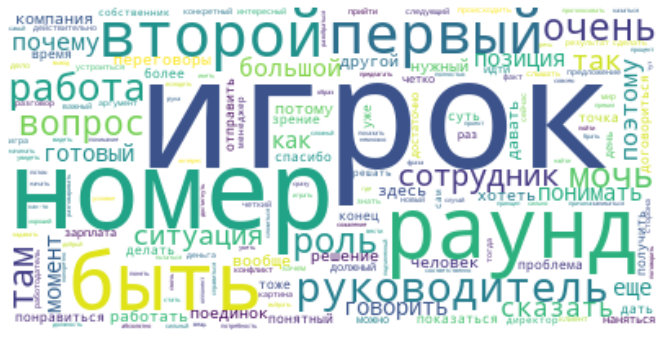

In [145]:
long_text = ' '.join(judge_1_sent)
wordcloud = WordCloud(
    background_color='white', max_words=1000, contour_width=3, stopwords=stopwords.words('russian'), random_state=2
)
wordcloud.generate_from_frequencies(Counter(long_text.split()))

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [148]:
stopwords_judge_1 = [
    'игрок', 'номер', 'сказать', 'говорить', 'мочь', 'наняться',
    'раунд', 'поединок', 'первый', 'второй', 'устроиться', 'почему', 'спасибо', 'конец', 
    'отправить', 'переговоры', 'работа', 'поэтому', 'проголосовать', 'хотеть',
    'момент', 'компания'
]

In [149]:
tfidf = TfidfVectorizer(stop_words=stopwords.words('russian') + stopwords_judge_1)
dtm_tfidf = tfidf.fit_transform(judge_1_sent)

In [150]:
lda_tfidf = LatentDirichletAllocation(n_components=3, random_state=0)
_ = lda_tfidf.fit(dtm_tfidf)

In [151]:
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf, mds='tsne')

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: 

PreparedData(topic_coordinates=                 x            y  topics  cluster       Freq
topic                                                      
2     -1015.700562  1338.981201       1        1  34.562927
0      -387.996002  -373.316162       2        1  34.464530
1     -2184.745605   -60.565800       3        1  30.972543, topic_info=              Term      Freq     Total Category  logprob  loglift
455         нужный  2.000000  2.000000  Default  30.0000  30.0000
74           время  2.000000  2.000000  Default  29.0000  29.0000
68          вопрос  3.000000  3.000000  Default  28.0000  28.0000
615        позиция  2.000000  2.000000  Default  27.0000  27.0000
622     показаться  2.000000  2.000000  Default  26.0000  26.0000
..             ...       ...       ...      ...      ...      ...
142  действительно  0.750855  1.477825   Topic3  -5.8543   0.4950
68          вопрос  0.956463  3.906786   Topic3  -5.6122  -0.2352
629      полностью  0.749744  1.660390   Topic3  -5.8557   0.3770
823        решение  0.785121  2.285014   Topic3  -5.8096   0.1038
67          вообще  0.750306  1.895991   Topic3  -5.8550   0.2451

[169 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
3         3  0.790255    абсолютно
21        2  0.686033      большой
21        3  0.343016      большой
40        1  0.651216         вещь
42        1  1.123915       взгляд
...     ...       ...          ...
1063      2  0.598107        четко
1063      3  0.598107        четко
1065      3  0.972707  чувствовать
1068      2  1.127161         шанс
1084      2  1.066931     являться

[162 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

In [152]:
lda_tfidf.bound_

3631.7358781189064

### Переговоры

In [153]:
judge_2_sent = []
for speech in all_judge_speech['judge_2'].values():
    natasha_text = apply_natasha(speech)
    judge_2_sent.extend(natasha_text)

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

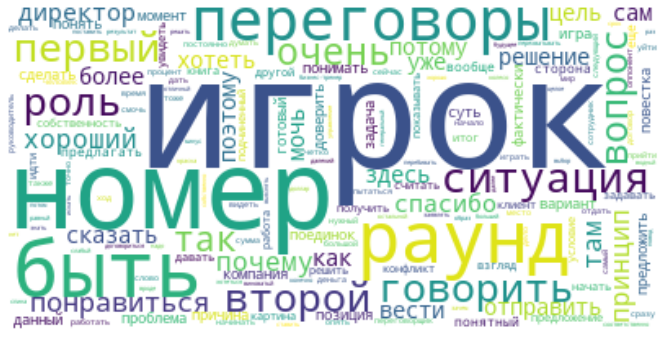

In [154]:
long_text = ' '.join(judge_2_sent)
wordcloud = WordCloud(
    background_color='white', max_words=1000, contour_width=3, stopwords=stopwords.words('russian'), random_state=2
)
wordcloud.generate_from_frequencies(Counter(long_text.split()))

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [155]:
stopwords_judge_2 = [
    'игрок', 'номер', 'сказать', 'говорить', 'мочь', 'наняться',
    'раунд', 'поединок', 'первый', 'второй', 'устроиться', 'почему', 'спасибо', 'конец', 
    'отправить', 'переговоры', 'работа', 'поэтому', 'проголосовать', 'хотеть',
    'момент', 'компания', 'очень', 'понравиться', 'хороший'
]

In [156]:
tfidf = TfidfVectorizer(stop_words=stopwords.words('russian') + stopwords_judge_2)
dtm_tfidf = tfidf.fit_transform(judge_2_sent)

In [167]:
lda_tfidf = LatentDirichletAllocation(n_components=4, random_state=0)
_ = lda_tfidf.fit(dtm_tfidf)

In [168]:
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf, mds='tsne')

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      269.562408 -124.803398       1        1  25.212983
2        1.782994 -295.079681       2        1  25.172630
3      220.811432 -343.832123       3        1  25.132425
0       50.533993  -76.050934       4        1  24.481962, topic_info=           Term      Freq     Total Category  logprob  loglift
684  предлагать  2.000000  2.000000  Default  30.0000  30.0000
651      понять  2.000000  2.000000  Default  29.0000  29.0000
179    доверить  2.000000  2.000000  Default  28.0000  28.0000
598    повестка  2.000000  2.000000  Default  27.0000  27.0000
223    задавать  2.000000  2.000000  Default  26.0000  26.0000
..          ...       ...       ...      ...      ...      ...
270      играть  0.575536  1.497666   Topic4  -5.8586   0.4509
813        роль  0.680630  4.676933   Topic4  -5.6909  -0.5201
922        суть  0.563686  2.198586   Topic4  -5.8794   0.0462
830     сделать  0.562304  2.492624   Topic4  -5.8819  -0.0818
308     картина  0.552136  1.548116   Topic4  -5.9001   0.3762

[231 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
34        3  0.741886  больший
35        2  0.579041  большой
47        1  0.487755  вариант
47        3  0.487755  вариант
59        1  0.384028    вести
...     ...       ...      ...
1028      4  0.847306    целое
1029      1  0.418371     цель
1029      3  0.418371     цель
1029      4  0.418371     цель
1034      2  0.708978  человек

[158 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1])

### Собственность

In [170]:
judge_3_sent = []
for speech in all_judge_speech['judge_3'].values():
    natasha_text = apply_natasha(speech)
    judge_3_sent.extend(natasha_text)

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/vall/opt/anaconda3/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspe

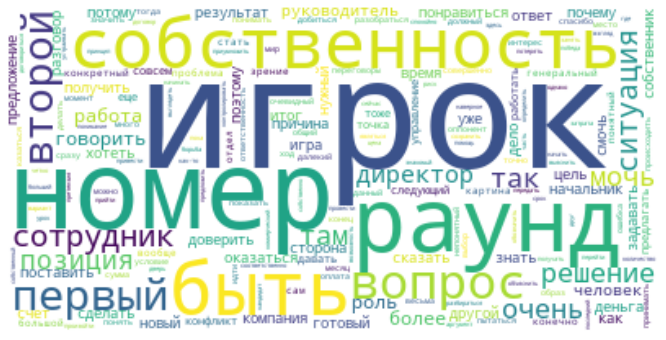

In [171]:
long_text = ' '.join(judge_3_sent)
wordcloud = WordCloud(
    background_color='white', max_words=1000, contour_width=3, stopwords=stopwords.words('russian'), random_state=2
)
wordcloud.generate_from_frequencies(Counter(long_text.split()))

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [178]:
stopwords_judge_3 = [
    'игрок', 'номер', 'сказать', 'говорить', 'мочь', 'наняться',
    'раунд', 'поединок', 'первый', 'второй', 'устроиться', 'почему', 'спасибо', 'конец', 
    'отправить', 'переговоры', 'работа', 'поэтому', 'проголосовать', 'хотеть',
    'момент', 'очень', 'понравиться', 'хороший', 'собственность', 'доверить',
    'управление', 'смочь', 'игра'
]

In [179]:
tfidf = TfidfVectorizer(stop_words=stopwords.words('russian') + stopwords_judge_3)
dtm_tfidf = tfidf.fit_transform(judge_3_sent)

In [185]:
lda_tfidf = LatentDirichletAllocation(n_components=3, random_state=0)
_ = lda_tfidf.fit(dtm_tfidf)

In [186]:
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf, mds='tsne')

PreparedData(topic_coordinates=                 x            y  topics  cluster       Freq
topic                                                      
1     -1015.700562  1338.981201       1        1  41.104959
0      -387.996002  -373.316162       2        1  34.983397
2     -2184.745605   -60.565800       3        1  23.911645, topic_info=              Term      Freq     Total Category  logprob  loglift
128         вопрос  4.000000  4.000000  Default  30.0000  30.0000
610    неизвестный  1.000000  1.000000  Default  29.0000  29.0000
1157      ситуация  2.000000  2.000000  Default  28.0000  28.0000
415           итог  2.000000  2.000000  Default  27.0000  27.0000
269        договор  1.000000  1.000000  Default  26.0000  26.0000
...            ...       ...       ...      ...      ...      ...
1014   происходить  0.516998  1.251271   Topic3  -6.1368   0.5469
1250       сторона  0.640959  2.091728   Topic3  -5.9218   0.2480
189    генеральный  0.507234  1.440655   Topic3  -6.1558   0.3869
864        позиция  0.543911  2.284466   Topic3  -6.0860  -0.0043
1118  руководитель  0.505095  2.022222   Topic3  -6.1600   0.0436

[178 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
19        3  1.189782  аудитория
29        2  1.226403      белка
47        1  0.808977    большой
60        2  1.232492   вакансия
62        1  0.781650    вариант
...     ...       ...        ...
1375      2  0.878348    уходить
1404      1  0.571889       цель
1404      2  0.571889       цель
1417      1  0.440831    человек
1417      2  0.440831    человек

[137 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [187]:
lda_tfidf.bound_

5180.854920334538

### Summarization

In [8]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
import torch
MODEL_NAME = 'cointegrated/rut5-base-absum'
model = T5ForConditionalGeneration.from_pretrained(MODEL_NAME)
tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME)
# model.cuda();
model.eval();

def summarize(
    text, n_words=None, compression=None,
    max_length=1000, num_beams=3, do_sample=False, repetition_penalty=10.0, 
    **kwargs
):
    """
    Summarize the text
    The following parameters are mutually exclusive:
    - n_words (int) is an approximate number of words to generate.
    - compression (float) is an approximate length ratio of summary and original text.
    """
    if n_words:
        text = '[{}] '.format(n_words) + text
    elif compression:
        text = '[{0:.1g}] '.format(compression) + text
    x = tokenizer(text, return_tensors='pt', padding=True).to(model.device)
    with torch.inference_mode():
        out = model.generate(
            **x, 
            max_length=max_length, num_beams=num_beams, 
            do_sample=do_sample, repetition_penalty=repetition_penalty, 
            **kwargs
        )
    return tokenizer.decode(out[0], skip_special_tokens=True)

text = """Высота башни составляет 324 метра (1063 фута), примерно такая же высота, как у 81-этажного здания, и самое высокое сооружение в Париже. Его основание квадратно, размером 125 метров (410 футов) с любой стороны. Во время строительства Эйфелева башня превзошла монумент Вашингтона, став самым высоким искусственным сооружением в мире, и этот титул она удерживала в течение 41 года до завершения строительство здания Крайслер в Нью-Йорке в 1930 году. Это первое сооружение которое достигло высоты 300 метров. Из-за добавления вещательной антенны на вершине башни в 1957 году она сейчас выше здания Крайслер на 5,2 метра (17 футов). За исключением передатчиков, Эйфелева башня является второй самой высокой отдельно стоящей структурой во Франции после виадука Мийо."""
print(summarize(text))
# Эйфелева башня достигла высоты 300 метров.
print(summarize(text, n_words=10))
# Французская Эйфелева башня достигла высоты 300 метров.


Эйфелева башня достигла высоты 300 метров.
Французская Эйфелева башня достигла высоты 300 метров.


In [27]:
for title, opinion in all_judge_speech['judge_3'].items():
    print(title)
    print(summarize(opinion, n_words=50))
    print('')

20200415 - Cherchez la femme
Посмотрим по игры по раунду номер два, что получилось в результате первого раунда.

20200520 - Уникальный станочник
В первом раунде Алексей активно отстаивал свою позицию, выторговал вместо там отработанных трех часов.

20200429 - Конфликтный сотрудник
Почему в первом раунде игрок номер два грамотно устроился на поле?

20200520 - Гонорар 1
Мне понравилась игра Драко 1, но в первом раунде кв-2 потерял деньги под наши за славой.

20200422 - Играть нельзя работать
В первом раунде игрок номер один вы в роли супруги во-первых подходите к откровенному шантажу.

20200415 - Премия
Мне непонятно, за что боролся игрок номер один в первом и во втором раунде

20200520 - Гонорар 2
Мне нравилась игра обоих игроков. По первому раунду игрок номер 1 не понравился ход игрока номер один, когда он сразу растаял.

20200513 - Провинившийся менеджер
В первом раунде игрок номер один ошибся с выбором ролей, но мой взгляд ошибся с выбором ролей.

20200429 - Смена работы
Если бы этот

### Sentiment

In [28]:
# !pip install transformers sentencepiece --quiet
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_checkpoint = 'cointegrated/rubert-tiny-sentiment-balanced'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)
if torch.cuda.is_available():
    model.cuda()
    
def get_sentiment(text, return_type='label'):
    """ Calculate sentiment of a text. `return_type` can be 'label', 'score' or 'proba' """
    with torch.no_grad():
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True).to(model.device)
        proba = torch.sigmoid(model(**inputs).logits).cpu().numpy()[0]
    if return_type == 'label':
        return model.config.id2label[proba.argmax()]
    elif return_type == 'score':
        return proba.dot([-1, 0, 1])
    return proba

text = 'Какая гадость эта ваша заливная рыба!'
# classify the text
print(get_sentiment(text, 'label'))  # negative
# score the text on the scale from -1 (very negative) to +1 (very positive)
print(get_sentiment(text, 'score'))  # -0.5894946306943893
# calculate probabilities of all labels
print(get_sentiment(text, 'proba'))  # [0.7870447  0.4947824  0.19755007]


Downloading:   0%|          | 0.00/377 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/235k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/457k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/884 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/45.0M [00:00<?, ?B/s]

negative
-0.5894947648048401
[0.78704476 0.4947824  0.19755   ]


In [76]:
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests

In [34]:
judge_1_score = list(
    map(lambda x: get_sentiment(x, 'score'), all_judge_speech['judge_1'].values())
)
judge_2_score = list(
    map(lambda x: get_sentiment(x, 'score'), all_judge_speech['judge_2'].values())
)
judge_3_score = list(
    map(lambda x: get_sentiment(x, 'score'), all_judge_speech['judge_3'].values())
)

In [63]:
tukey_comparison = pairwise_tukeyhsd(
    endog=[*judge_1_score, *judge_2_score, *judge_3_score],
    groups=['judge_1']*34 + ['judge_2']*34 + ['judge_3']*34,
    alpha=0.05
)

In [64]:
print(tukey_comparison)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
judge_1 judge_2   0.0456 0.8733 -0.1835 0.2747  False
judge_1 judge_3  -0.1436 0.2997 -0.3727 0.0855  False
judge_2 judge_3  -0.1892 0.1262 -0.4183 0.0399  False
-----------------------------------------------------


In [73]:
judge_scores = [judge_1_score, judge_2_score, judge_3_score]
zero_pvals = [ttest_1samp(score, popmean=0)[1] for score in judge_scores]
pair_pvals = [
    ttest_ind(judge_1_score, judge_2_score)[1],
    ttest_ind(judge_1_score, judge_3_score)[1],
    ttest_ind(judge_2_score, judge_3_score)[1]
]

In [103]:
np.round(pair_pvals, 4)

array([0.6513, 0.0846, 0.0756])

In [86]:
result = multipletests(pvals=[*zero_pvals, *pair_pvals], alpha=0.05, method='bonferroni')

In [104]:
result

(array([ True,  True,  True, False, False, False]),
 array([5.23003173e-05, 4.95349064e-02, 3.97650886e-07, 1.00000000e+00,
        5.07684259e-01, 4.53670652e-01]),
 0.008512444610847103,
 0.008333333333333333)

In [102]:
np.round(result[1], 4)

array([1.000e-04, 4.950e-02, 0.000e+00, 1.000e+00, 5.077e-01, 4.537e-01])

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

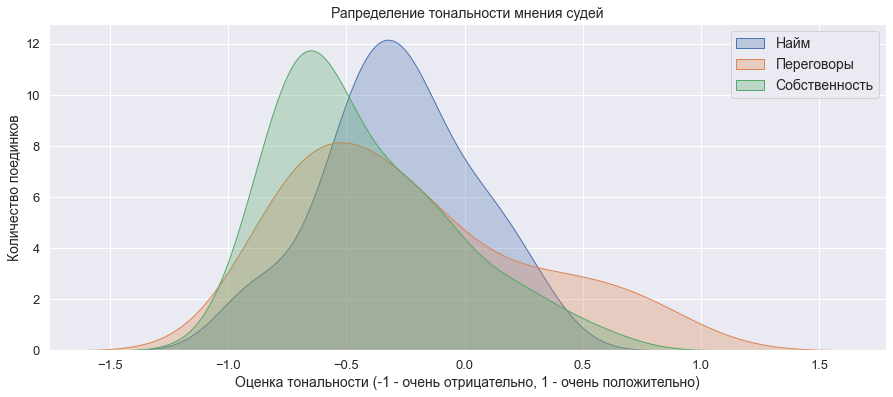

In [99]:
plt.figure(figsize=(15, 6))
sns.set()
sns.kdeplot(judge_1_score, fill=True, alpha=0.3, label='Найм')
sns.kdeplot(judge_2_score, fill=True, alpha=0.3, label='Переговоры')
sns.kdeplot(judge_3_score, fill=True, alpha=0.3, label='Собственность')

plt.title('Рапределение тональности мнения судей', fontsize=14)
plt.ylabel('Количество поединков', fontsize=14)
plt.xlabel('Оценка тональности (-1 - очень отрицательно, 1 - очень положительно)', fontsize=14)\

plt.xticks(fontsize=13)
plt.yticks(fontsize=13, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1, 1.2], labels=[0, 2, 4, 6, 8, 10, 12])
plt.legend(loc='upper right', fontsize=14)
plt.show()